In [1]:
import numpy as np
import tifffile as tiff
from PARC import parc
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import umap
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.manifold import TSNE

In [2]:
name = ['Hoechst', '5hmc', '5mc', 'Collagen 1', 'Fibronectin', 'aSMA', 'Pan Cyto', 'Calponin', 'VCAM 1']
sample = ['1L', '7L', '11L', '17L']
ROI = ['R1', 'R2', 'R3', 'R4']
n = 15

In [ ]:
def Pixel(sample, ROI, name, n):

    image = tiff.imread('data/Pixel 2/Dataset/' + sample + '/' + ROI + '/' + sample + ' ' + name + '.tif')

    mask = tiff.imread('data/Pixel 2/Dataset/' + sample + '/' + ROI + '/' + sample + ' ' + name + '_Probabilities_0.tiff')

    # Ensure mask is binary (0 and 1)
    mask = (mask > 0.3).astype(np.uint8)  # Converts to boolean mask

    # Overlay the mask (red overlay)
    overlay = np.dstack([image, image, image])  # Convert grayscale to RGB
    overlay[..., 0] = np.where(mask == 1, 255, overlay[..., 0])  # Red channel

    overlapping_intensities = image * mask

    matrix = overlapping_intensities

    # Compute the new dimensions rounded up to the nearest multiple of 3
    new_rows = int(np.ceil(matrix.shape[0] / n) * n)
    new_cols = int(np.ceil(matrix.shape[1] / n) * n)

    # Pad the matrix with the edge values to match the new size
    padded_matrix = np.pad(matrix, 
                            ((0, new_rows - matrix.shape[0]), (0, new_cols - matrix.shape[1])), 
                            mode='edge')

    # Reshape into 3x3 patches
    patches = padded_matrix.reshape(new_rows // n, n, new_cols // n, n)

    # Compute the mean over the 3x3 patches
    averaged_matrix = patches.mean(axis=(1, 3))

    # pd.DataFrame(averaged_matrix)

    # column_vector = [item for sublist in overlapping_intensities for item in sublist]
    column_vector = averaged_matrix.reshape(-1,1)
    # print(len(column_vector))
    
    flatten = pd.DataFrame(column_vector, columns = [name])
    return flatten

In [4]:
WT_R1 = pd.DataFrame()
for k in range(len(name)):
    WT_R1 = pd.concat([WT_R1, Pixel(sample[0], ROI[0], name[k], n)], axis=1)

WT_R2 = pd.DataFrame()
for k in range(len(name)):
    WT_R2 = pd.concat([WT_R2, Pixel(sample[0], ROI[1], name[k], n)], axis=1)

WT_R3 = pd.DataFrame()
for k in range(len(name)):
    WT_R3 = pd.concat([WT_R3, Pixel(sample[0], ROI[2], name[k], n)], axis=1)

WT_R4 = pd.DataFrame()
for k in range(len(name)):
    WT_R4 = pd.concat([WT_R4, Pixel(sample[0], ROI[3], name[k], n)], axis=1)

WTHF_R1 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R1 = pd.concat([WTHF_R1, Pixel(sample[1], ROI[0], name[k], n)], axis=1)

WTHF_R2 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R2 = pd.concat([WTHF_R2, Pixel(sample[1], ROI[1], name[k], n)], axis=1)

WTHF_R3 = pd.DataFrame()
for k in range(len(name)):
    WTHF_R3 = pd.concat([WTHF_R3, Pixel(sample[1], ROI[2], name[k], n)], axis=1)

FB_R1 = pd.DataFrame()
for k in range(len(name)):
    FB_R1 = pd.concat([FB_R1, Pixel(sample[2], ROI[0], name[k], n)], axis=1)

FB_R2 = pd.DataFrame()
for k in range(len(name)):
    FB_R2 = pd.concat([FB_R2, Pixel(sample[2], ROI[1], name[k], n)], axis=1)

FB_R3 = pd.DataFrame()
for k in range(len(name)):
    FB_R3 = pd.concat([FB_R3, Pixel(sample[2], ROI[2], name[k], n)], axis=1)

FB_R4 = pd.DataFrame()
for k in range(len(name)):
    FB_R4 = pd.concat([FB_R4, Pixel(sample[2], ROI[3], name[k], n)], axis=1)

FBHF_R1 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R1 = pd.concat([FBHF_R1, Pixel(sample[3], ROI[0], name[k], n)], axis=1)

FBHF_R2 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R2 = pd.concat([FBHF_R2, Pixel(sample[3], ROI[1], name[k], n)], axis=1)

FBHF_R3 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R3 = pd.concat([FBHF_R3, Pixel(sample[3], ROI[2], name[k], n)], axis=1)

FBHF_R4 = pd.DataFrame()
for k in range(len(name)):
    FBHF_R4 = pd.concat([FBHF_R4, Pixel(sample[3], ROI[3], name[k], n)], axis=1)

In [5]:
for i in range(len(sample)):
    if sample[i] == '1L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS1 = pd.concat([DS, oneROI])
            DS = pixelDS1
    if sample[i] == '7L':
        DS = pd.DataFrame()
        for j in range(len(ROI)-1):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS2 = pd.concat([DS, oneROI])
            DS = pixelDS2
    if sample[i] == '11L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS3 = pd.concat([DS, oneROI])
            DS = pixelDS3
    if sample[i] == '17L':
        DS = pd.DataFrame()
        for j in range(len(ROI)):
            oneROI = pd.DataFrame()
            for k in range(len(name)):
                oneROI = pd.concat([oneROI, Pixel(sample[i], ROI[j], name[k], n)], axis=1)
            pixelDS4 = pd.concat([DS, oneROI])
            DS = pixelDS4

In [6]:
# df = pixelDS1
# df = pixelDS2
# df = pixelDS3
df = pixelDS4
scaler = StandardScaler()
x_scaled = scaler.fit_transform(np.log(df+0.1))
# x_scaled = scaler.fit_transform(x_scaled.T).T
df_exp = pd.DataFrame(
    x_scaled, index=df.index, columns=df.columns
)
df_exp
X = df_exp.values
parc1 = parc.PARC(X, jac_weighted_edges = False, random_seed=0)
parc1.run_PARC() 
parc_labels = parc1.labels
len(parc_labels)


input data has shape 118306 (samples) x 9 (features)
knn struct was not available, so making one
commencing local pruning based on Euclidean distance metric at 3 s.dev above mean
commencing global pruning
commencing community detection
partition type MVP
list of cluster labels and populations 135 [(0, 7220), (1, 5929), (2, 4695), (3, 4600), (4, 4224), (5, 4205), (6, 4048), (7, 3517), (8, 2495), (9, 2434), (10, 2357), (11, 2198), (12, 2027), (13, 1930), (14, 1892), (15, 1803), (16, 1759), (17, 1739), (18, 1755), (19, 1728), (20, 1427), (21, 1280), (22, 1229), (23, 1197), (24, 1179), (25, 1130), (26, 1116), (27, 1122), (28, 1080), (29, 959), (30, 952), (31, 923), (32, 896), (33, 895), (34, 884), (35, 862), (36, 783), (37, 760), (38, 718), (39, 691), (40, 684), (41, 614), (42, 605), (43, 573), (44, 526), (45, 516), (46, 515), (47, 505), (48, 485), (49, 475), (50, 474), (51, 469), (52, 448), (53, 445), (54, 427), (55, 424), (56, 413), (57, 410), (58, 409), (59, 399), (60, 399), (61, 384), 

118306

In [7]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded_umap = tsne.fit_transform(df)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(np.log(df+0.1))
x_scaled = scaler.fit_transform(x_scaled.T).T
# x_scaled = StandardScaler().fit_transform(df)
df_exp = pd.DataFrame(
    x_scaled, index=df.index, columns=df.columns
)


In [8]:
def create_HM(df_per_label, my_cmap, row_colors, scale_name, cellSizePixels=20, **kwargs):
    # Calulate the figure size, this gets us close, but not quite to the right place
    dpi = matplotlib.rcParams['figure.dpi']
    marginWidth = matplotlib.rcParams['figure.subplot.right']-matplotlib.rcParams['figure.subplot.left']
    marginHeight = matplotlib.rcParams['figure.subplot.top']-matplotlib.rcParams['figure.subplot.bottom']
    Ny,Nx = df_per_label.shape
    figWidth = (Nx*cellSizePixels/dpi)/marginWidth
    figHeigh = (Ny*cellSizePixels/dpi)/marginHeight
    
    ax = sns.clustermap(df_per_label,
                        xticklabels=True,
                        cmap=my_cmap,
                        linewidth=0.5,
                        col_cluster=False,
                        row_colors=[row_colors],
                        dendrogram_ratio=(.1, 0.0),
                        figsize=(figWidth, figHeigh),
                        **kwargs
                        )
    ax.ax_heatmap.set_yticklabels(
        ax.ax_heatmap.get_yticklabels(), rotation=0)
    ax.ax_heatmap.set_xticklabels(
        ax.ax_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.ax_heatmap.set_xlabel('Marker')
    ax.ax_heatmap.set_ylabel('Cluster')
    
    # calculate the size of the heatmap axes
    axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
    axHeight = (Ny*cellSizePixels)/(figHeigh*dpi)

    # resize heatmap
    ax_heatmap_orig_pos = ax.ax_heatmap.get_position()
    ax.ax_heatmap.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                  axWidth, axHeight])

    # resize dendrograms to match
    ax_row_orig_pos = ax.ax_row_dendrogram.get_position()
    ax.ax_row_dendrogram.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                         ax_row_orig_pos.width, axHeight])
    ax_row_orig_pos = ax.ax_row_colors.get_position()
    ax.ax_row_colors.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                         ax_row_orig_pos.width, axHeight])

    pos = ax.ax_heatmap.get_position()
    cbar_size=0.2
    ax.ax_cbar.set_position((1.05, pos.y0, .03, cbar_size))
    
    # Change colorbar label position
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.set_label(scale_name, fontsize=12)

    for _, spine in ax.ax_heatmap.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(3)

In [9]:
my_cmap = "bwr"
scale_name = "Z-score"

df_exp["label"] = parc_labels

# Get dataframe per cluster
df_per_label = df_exp.groupby("label").mean()

df_exp

,Hoechst,5hmc,5mc,Collagen 1,Fibronectin,aSMA,Pan Cyto,Calponin,VCAM 1,label
0,1.249749,0.988050,1.391162,-1.581536,-1.244329,0.265250,-0.226013,-0.440403,-0.401931,16
1,1.190193,0.993083,1.132272,-1.681346,-1.334502,0.304643,0.371283,-0.507599,-0.468028,16
2,-0.961964,-0.632443,-0.921115,-1.207189,1.997330,0.802666,0.855681,0.012950,0.054085,17
3,-1.294251,-0.933842,-1.249572,1.805849,0.819023,0.437410,0.826299,-0.227953,-0.182962,4
4,-1.104827,-0.729386,-1.058285,1.733828,-0.973427,0.933072,1.140270,0.005943,0.052811,15
...,...,...,...,...,...,...,...,...,...,...
29661,-1.030922,-0.646479,-0.983264,-1.317018,0.910802,1.312019,1.493909,0.106481,0.154472,17
29662,0.905715,-1.345263,1.173431,1.032829,-1.567873,0.533997,0.573425,-0.674507,-0.631755,3
29663,1.372378,-0.905522,1.490913,-1.382599,-1.083317,0.569456,0.644153,-0.369803,-0.335658,12
29664,1.234447,-1.287862,1.343315,0.763737,-1.484293,0.371276,0.413627,-0.695986,-0.658261,3


In [10]:
# Get linkage
d = sch.distance.pdist(df_per_label, metric='cosine')
L = sch.linkage(d, method="average")

# Get colormap
vals = np.linspace(0, 1, len(df_per_label))

my_cmap_row = plt.cm.tab20(vals)

# Clustermap and umap
labels = df_per_label.index.to_list()
my_cmap_dict = dict(zip(labels, my_cmap_row))
row_colors = pd.DataFrame(labels)[0].map(my_cmap_dict)

In [11]:
def create_HM_col(df_per_label, my_cmap, row_colors, scale_name, cellSizePixels=20, **kwargs):
    # Calulate the figure size, this gets us close, but not quite to the right place
    dpi = matplotlib.rcParams['figure.dpi']
    marginWidth = matplotlib.rcParams['figure.subplot.right']-matplotlib.rcParams['figure.subplot.left']
    marginHeight = matplotlib.rcParams['figure.subplot.top']-matplotlib.rcParams['figure.subplot.bottom']
    Ny,Nx = df_per_label.shape
    figWidth = (Nx*cellSizePixels/dpi)/marginWidth
    figHeigh = (Ny*cellSizePixels/dpi)/marginHeight
    
    ax = sns.clustermap(df_per_label,
                        cmap=my_cmap,
                        linewidth=0.5,
                        row_cluster=False,
                        row_colors=[row_colors],
                        dendrogram_ratio=(0.0, 0.1),
                        figsize=(figWidth, figHeigh),
                        **kwargs
                        )
    ax.ax_heatmap.set_yticklabels(
        ax.ax_heatmap.get_yticklabels(), rotation=0, fontsize=12)
    ax.ax_heatmap.set_xticklabels(
        ax.ax_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
    ax.ax_heatmap.set_xlabel('Marker', fontsize=15)
    ax.ax_heatmap.set_ylabel('Cluster', fontsize=15)
    
    # calculate the size of the heatmap axes
    axWidth = (Nx*cellSizePixels)/(figWidth*dpi)
    axHeight = (Ny*cellSizePixels)/(figHeigh*dpi)

    # resize heatmap
    ax_heatmap_orig_pos = ax.ax_heatmap.get_position()
    ax.ax_heatmap.set_position([ax_heatmap_orig_pos.x0, ax_heatmap_orig_pos.y0, 
                                  axWidth, axHeight])

    # resize dendrograms to match
    ax_col_orig_pos = ax.ax_col_dendrogram.get_position()
    ax.ax_col_dendrogram.set_position([ax_col_orig_pos.x0, ax_heatmap_orig_pos.y0+axHeight,
                                         axWidth, ax_col_orig_pos.height])
    ax_row_orig_pos = ax.ax_row_colors.get_position()
    ax.ax_row_colors.set_position([ax_row_orig_pos.x0, ax_row_orig_pos.y0, 
                                         ax_row_orig_pos.width, axHeight])

    pos = ax.ax_heatmap.get_position()
    cbar_size=0.2
    ax.ax_cbar.set_position((1.05, pos.y0, .03, cbar_size))
    
    # Change colorbar label position
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.set_label(scale_name, fontsize=15)

    for _, spine in ax.ax_heatmap.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(3)

d2 = sch.distance.pdist(df_per_label.T, metric='cosine')
L2 = sch.linkage(d2, method="average")
# create_HM_col(df_per_label, my_cmap, row_colors, scale_name, col_linkage=L2)

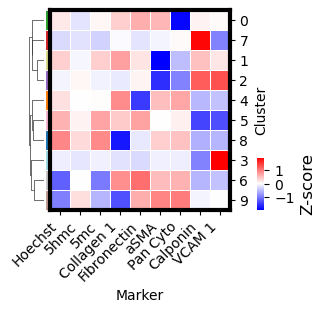

In [12]:
tol = 0.35

# Merge similar cluster
clusters = sch.fcluster(L, tol * d.max(), "distance")-1
clusters_unique = np.unique(clusters)
n_clusters = len(np.unique(clusters))

# Clustermap and umap
label2cluster = dict(zip(labels, clusters))
result = defaultdict(int)
for k, v in zip(clusters, labels):
    result[k] = max(result[k], v)
row_colors = pd.DataFrame(labels)[0].map(label2cluster).map(result).map(my_cmap_dict)
clusters = np.array(list(map(label2cluster.get, parc_labels)))
new_parc_labels = np.array(list(map(result.get, clusters)))

# Clustermap and umap with new colormap
vals = np.linspace(0, 1, n_clusters)
np.random.seed(0)
np.random.shuffle(vals)
# vals = np.array([0.2, 0.5, 0.7, 0.3, 0.6, 0.4, 0.9, 0.0])
my_cmap_row = plt.cm.tab20(vals)
my_cmap_dict = dict(zip(clusters_unique, my_cmap_row))
row_colors = pd.DataFrame(labels)[0].map(label2cluster).map(my_cmap_dict)
new_parc_labels = np.array(list(map(label2cluster.get, parc_labels)))

# Combined 
df_combined = df_exp.copy()
df_combined.label = df_combined.label.map(label2cluster.get)
df_combined = df_combined.groupby("label").mean()
labels = df_combined.index.to_list()

row_colors = pd.DataFrame(labels)[0].map(my_cmap_dict)

create_HM(df_combined, my_cmap, row_colors, scale_name, cellSizePixels=20)

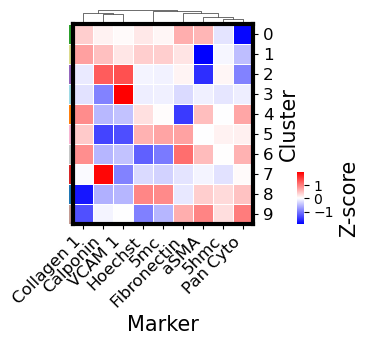

In [13]:
d2 = sch.distance.pdist(df_combined.T, metric='cosine')
L2 = sch.linkage(d2, method="average")
create_HM_col(df_combined, my_cmap, row_colors, scale_name, col_linkage=L2, cellSizePixels=20)

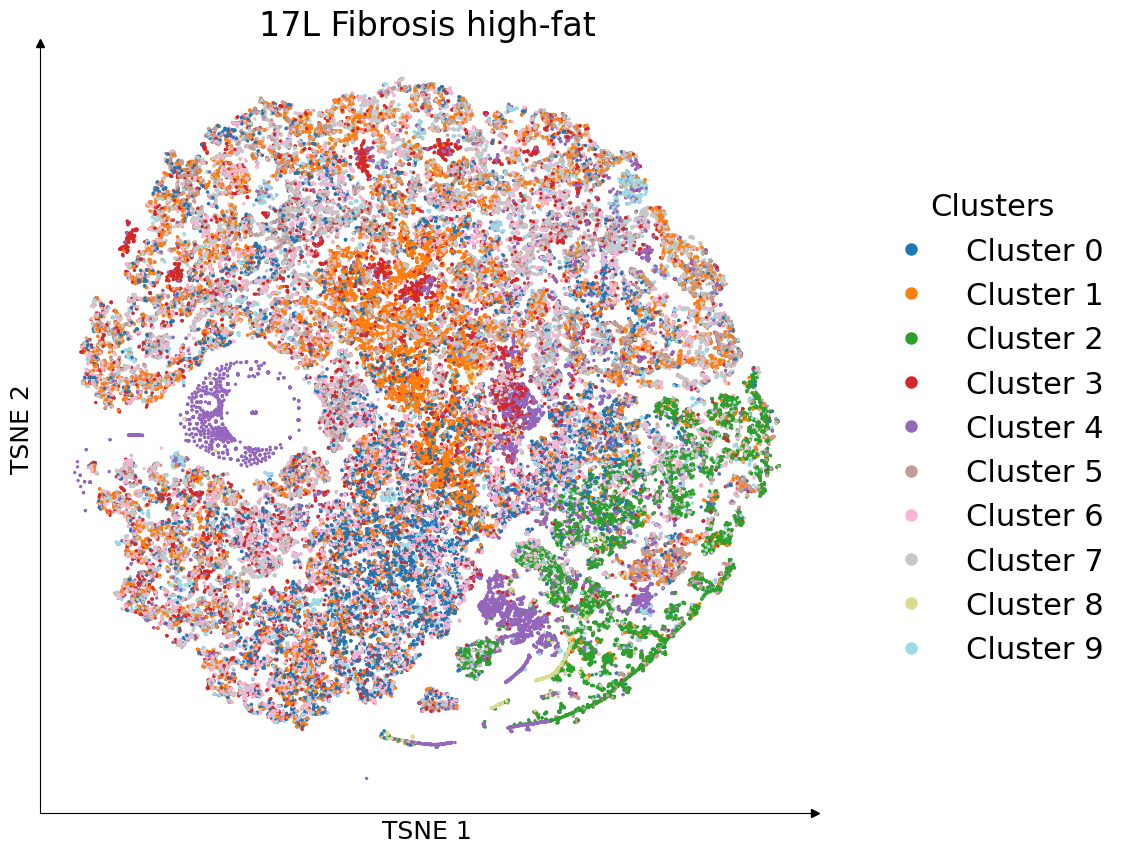

In [14]:
n = 1
embeddings_subset = X_embedded_umap[::n, :]
parc_labels_subset = parc_labels[::n]

# name='UMAP'
name='TSNE'
fig, ax = plt.subplots(figsize=(10, 10))
X, Y = X_embedded_umap[:, 0], X_embedded_umap[:, 1]
scatter = ax.scatter(X, Y, c=list(map(label2cluster.get, parc_labels_subset)), s=2, cmap=matplotlib.colors.ListedColormap(my_cmap_row))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

# Add arrow with spine
pos = ax.get_position()
ax.plot(pos.x1, pos.y0, ">k", transform=fig.transFigure, clip_on=False)
ax.plot(pos.x0, pos.y1, "^k", transform=fig.transFigure, clip_on=False)

# Add label
# ft = 13
ax.set_xlabel(f'{name} 1', fontsize=18)
ax.set_ylabel(f'{name} 2', fontsize=18)

unique_labels = np.unique(list(map(label2cluster.get, parc_labels_subset)))
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
ax.set_title('17L Fibrosis high-fat', fontsize=24)
handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor=colors[i],
        markersize=10,
        label=f"Cluster {label}",
    )
    for i, label in enumerate(unique_labels)
]
ax.legend(
    handles=handles,
    title="Clusters",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=22,
    title_fontsize=22,
    frameon=False,
)